# Clustering models

#### Created by: Ristanti Ramadanti

A template i created to help my (future) self building clustering model not from scratch.
Clustering is an unsupervised learning to classify our observations into certain number (k) of clusters.
Examples of implementation are for customer segmentations, sports player profiling, etc.

### Machine learning algorithm:
Clustering model with the following algorithms:
    - K-means Clustering

### Data analytics process include:

   - Preprocessing of data: merging, cleaning, transforming (scaling), feature engineering, variable selection
   - Choosing optimal k (for k-means clustering) using the following technique:
       - Silhouette analysis
       - Elbow method
   - Applying clustering analysis
   - Visualizing clusters

## 1st step: Preprocessing & EDA

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import math as m
from scipy import stats

# Importing Viz library
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "“backend" on line 1 in
/Users/rfdanti/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
directory = "/Users/folder/"
df = pd.read_csv(directory+"data.csv")

In [6]:
# Checking distribution of numerical variables: plotting histograms
# Make histogram plot
def plot_hist(data, title, colour='#55DDE0'):
    plt.hist(data, color=colour, edgecolor='white', label=title)
    plt.title('Distribution')
    plt.ylabel('Frequency', fontweight='bold')
    plt.xlabel(title, fontweight='bold')
    plt.show()

# Make scatter plot
def plot_scatter(data, xvar, yvar, x_label, y_label, title):
    plt.scatter(x=data[xvar], y=data[yvar], marker='.', s=30, alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [8]:
# To check correlation of categorical var
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
cramers_v(df["var1"], df["var2"])

0.05015912282857453

## Preprocessing
Data cleaning, scaling, feature engineering and pivoting data to prepare for merchant & buyer clustering analysis

In [ ]:
# Scaling variables to avoid biased model when analysing from variables with different scales
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(1, 10))
df[['var1','var2']] = scaler.fit_transform(df[['var1','var2']])

In [360]:
#Feature Engineering: transform several columns with missing value into binary variables
def missing_into_binary(df, old, new):
    df.rename(columns={old:new}, inplace=True)
    df[new] = df[new].fillna(0)
    df[new].values[dfp[new] > 0] = 1

# Creating variable is_promo to indicate whether transactions used promo
missing_into_binary(df, 'var1', 'is_var1')

In [ ]:
# Converting variables into the right data type
category = ['var1', 'var2']

for column in category:
    df[column] = df[column].astype('int')
    df[column] = df[column].astype('category')

print(df.dtypes) 

## 2nd step: Clustering Model (Unsupervised Learning)
- Creating a class for clustering which includes: 
    - K-means clustering model
    - elbow method to choose k
    - 2 dimension visualisation of cluster
- Applying clustering model to the 3 datasets (promo, seller, buyer)
- Merging the cluster variables with the transaction data

In [258]:
"""To display all outputs of each cell"""
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

"""To get a timing of each function"""
from time import time
def timing(f):
    def wrapper(*args, **kwargs):
        start = time()
        result = f(*args, **kwargs)
        end = time()
        print('function:%r took: %2.2f sec' % (f.__name__, end - start))
        return result
    return wrapper

'To display all outputs of each cell'

'To get a timing of each function'

### Creating Class for Clustering

In [54]:
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

# Creating a class for clustering analysis
class clustering():
    """Base processor to be used for all functions"""""
    def __init__(self, directory, df_, cluster_label): #directory = path to the folder containing df 
        self.df = df_
        self.cluster_label = cluster_label
        
    @timing
    def read(self):
        """Read raw data"""
        self.df = pd.read_csv(self.input_directory + self.df)
        print(self.df.head())
        
        
    @timing
    def elbow(self, k_to_check):
        self.X = self.df
        self.Sum_of_squared_distances = []
        self.K = range(2,k_to_check+1)
        for k in self.K:
            self.km = KMeans(n_clusters=k)
            self.km = self.km.fit(self.X)
            self.Sum_of_squared_distances.append(self.km.inertia_)

        plt.plot(self.K, self.Sum_of_squared_distances, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()
    
    @timing
    def model_fit(self, chosen_k, max_iter=100, n_init=10, random_state=1000):
        self.X = self.df
        self.chosen_k = chosen_k
        self.model = KMeans(n_clusters=self.chosen_k, max_iter=max_iter, n_init=n_init, random_state=random_state)
        self.cluster_labels = self.model.fit_predict(self.X)
        
        self.df_out = self.X
        self.df_out[self.cluster_label] = self.cluster_labels +1
        
        return self.df_out
    
    @timing    
    def visualize_model(self, xlabel, ylabel, x, y):
        
        # Plot showing the clusters formed
        self.colors = cm.nipy_spectral(self.cluster_labels.astype(float) / self.chosen_k)
        plt.scatter(self.X.iloc[:,x], self.X.iloc[:,y], marker='.', s=30, lw=0, alpha=0.7,
                        c=self.colors, edgecolor='k')

        # Labeling the clusters
        self.centers = self.model.cluster_centers_ +1
        # Draw white circles at cluster centers
        plt.scatter(self.centers[:, x], self.centers[:, y], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(self.centers, 1):
            plt.scatter(c[x], c[y], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')

        plt.title("The visualization of the clustered data: "+str(self.cluster_label))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
        
    @timing
    def silhouette(self, k_to_check, xlabel, ylabel, x, y):
        print(__doc__)

        self.range_clusters = range(2,k_to_check+1)
        self.n = []
        self.silhouette = []

        for self.n_clusters in self.range_clusters:
            # Create a subplot with 1 row and 2 columns
            self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2)
            self.fig.set_size_inches(18, 7)

            # The 1st subplot is the silhouette plot
            # Set plot of silhouette coefficient ranging from -0.1, 1 
            self.ax1.set_xlim([-0.1, 1])
            # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters.
            self.ax1.set_ylim([0, len(self.X) + (self.n_clusters + 1) * 10])

            # Initialize the clusterer with n_clusters value and a random generator set seed for reproducibility, 
            # if random_state=None, the random number generator is the RandomState instance used by np.random 
            self.clusterer = KMeans(n_clusters=self.n_clusters, max_iter=100, n_init=10, random_state=1000)
            self.cluster_labels = self.clusterer.fit_predict(self.X)

            # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed clusters
            self.silhouette_avg = silhouette_score(self.X, self.cluster_labels)
            self.n.append(self.n_clusters)
            self.silhouette.append(self.silhouette_avg)
            print("For n_clusters =", self.n_clusters,
                  "The average silhouette_score is :", self.silhouette_avg)

            # Compute the silhouette scores for each sample
            self.sample_silhouette_values = silhouette_samples(self.X, self.cluster_labels)

            self.y_lower = 10
            for i in range(self.n_clusters):
                # Aggregate the silhouette scores for samples belonging to
                # cluster i, and sort them
                self.ith_cluster_silhouette_values = \
                    self.sample_silhouette_values[self.cluster_labels == i]

                self.ith_cluster_silhouette_values.sort()

                self.size_cluster_i = self.ith_cluster_silhouette_values.shape[0]
                self.y_upper = self.y_lower + self.size_cluster_i

                self.color = cm.nipy_spectral(float(i) / self.n_clusters)
                self.ax1.fill_betweenx(np.arange(self.y_lower, self.y_upper),
                                  0, self.ith_cluster_silhouette_values,
                                  facecolor=self.color, edgecolor=self.color, alpha=0.7)

                # Label the silhouette plots with their cluster numbers at the middle
                self.ax1.text(-0.05, self.y_lower + 0.5 * self.size_cluster_i, str(i))

                # Compute the new y_lower for next plot
                self.y_lower = self.y_upper + 10  # 10 for the 0 samples

            self.ax1.set_title("The silhouette plot for the various clusters.")
            self.ax1.set_xlabel("The silhouette coefficient values")
            self.ax1.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the values
            self.ax1.axvline(x=self.silhouette_avg, color="red", linestyle="--")

            self.ax1.set_yticks([])  # Clear the yaxis labels / ticks
            self.ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            # 2nd Plot showing the actual clusters formed
            self.colors = cm.nipy_spectral(self.cluster_labels.astype(float) / self.n_clusters)
            self.ax2.scatter(self.X.iloc[:,x], self.X.iloc[:,y], marker='.', s=30, lw=0, alpha=0.7,
                        c=self.colors, edgecolor='k')

            # Labeling the clusters
            self.centers = self.clusterer.cluster_centers_
            # Draw white circles at cluster centers
            self.ax2.scatter(self.centers[:, x], self.centers[:, y], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

            for i, c in enumerate(self.centers):
                self.ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')

            self.ax2.set_title("The visualization of the clustered data.")
            self.ax2.set_xlabel(xlabel)
            self.ax2.set_ylabel(ylabel)

            plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                          "with n_clusters = %d" % self.n_clusters),
                         fontsize=14, fontweight='bold')

        # Calling DataFrame constructor after zipping both lists, with columns specified 
        self.s = pd.DataFrame(list(zip(self.n, self.silhouette)), 
                         columns =['N of clusters', 'Silhouette score']) 
        # Plotting silhouette score for all k
        self.fig, self.ax = plt.subplots(1, 1)
        self.fig.set_size_inches(18, 7)

        self.ax.plot(self.s['N of clusters'], self.s['Silhouette score'], 'bx-')
        self.ax.set_xlabel('N of clusters')
        self.ax.set_ylabel('Silhouette score')
        self.ax.set_title('Silhouette Method For Optimal k')
        
        plt.show()

### Applying Clustering to Promo

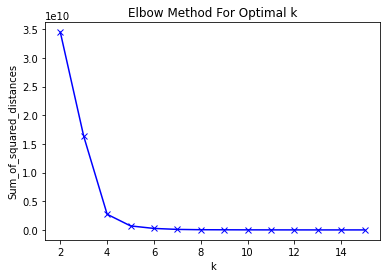

function:'elbow' took: 0.61 sec


In [56]:
cluster = clustering("", df, "cluster")
cluster.elbow(15) #checking k from 2 to 15

In [ ]:
#Applying silhouette method to help choosing number of k for K-means clustering
#Choose 2 variables for visualisation purpose. K-means clustering model still consider all variables as input
cluster.silhouette(10, "var1", "var2", 0, 1) #checking k 2-10

In [57]:
# Based on elbow method graph, optimal k=4 
result = cluster.model_fit(4)

function:'model_fit' took: 0.03 sec


In [ ]:
cluster.visualize_model("Var 1", "Var 2", 0, 1)

In [59]:
# Adding new column of cluster label
def add_cluster(df, df_cluster, label, lookup):
    df_cluster = df_cluster.reset_index()
    sub_df = df_cluster[[lookup, label]]
    df = pd.merge(df, sub_df, on=lookup, how='left')
    return df

In [106]:
# Saving to csv 
#result.to_csv("result.csv")